# Market Risk

The dataset contains 6 years of information(weekly stock information) on the stock prices of 10 different Indian Stocks. Calculate the mean and standard deviation on the stock returns and share insights.
Please find attached the files to be referred.

**Market Risk Dataset**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

Top 5 rows of the data

In [2]:
df = pd.read_csv("Market+Risk+Dataset.csv")
df.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [3]:
df.shape

(314, 11)

In [4]:
df.describe()

,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,511.340764,114.560510,636.678344,540.742038,59.095541,14806.410828,633.468153,147.627389,53.713376,372.659236
std,135.952051,22.509732,102.879975,115.835569,15.810493,4288.275085,171.855893,65.879195,31.248985,202.262668
min,234.000000,64.000000,284.000000,263.000000,21.000000,5543.000000,338.000000,53.000000,3.000000,14.000000
25%,424.000000,96.000000,572.000000,470.500000,47.000000,10952.250000,478.500000,88.250000,25.250000,243.250000
50%,466.500000,115.000000,625.000000,528.000000,57.000000,16018.500000,614.000000,142.500000,53.000000,376.000000
75%,630.750000,134.000000,678.000000,605.250000,71.750000,17773.250000,785.000000,182.750000,82.000000,534.000000
max,810.000000,157.000000,956.000000,808.000000,104.000000,24806.000000,1089.000000,338.000000,117.000000,871.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian Hotel         314 non-null    int64 
 3   Mahindra & Mahindra  314 non-null    int64 
 4   Axis Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree Cement         314 non-null    int64 
 7   Sun Pharma           314 non-null    int64 
 8   Jindal Steel         314 non-null    int64 
 9   Idea Vodafone        314 non-null    int64 
 10  Jet Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [6]:
## converting date variable from object to datetime

df['Date']=pd.to_datetime(df['Date'])

In [7]:
df['dates'] = [pd.to_datetime(d) for d in df['Date']]

In [8]:
## Checking for duplicate values

df.duplicated().sum()

0

In [9]:
df.dtypes

Date                   datetime64[ns]
Infosys                         int64
Indian Hotel                    int64
Mahindra & Mahindra             int64
Axis Bank                       int64
SAIL                            int64
Shree Cement                    int64
Sun Pharma                      int64
Jindal Steel                    int64
Idea Vodafone                   int64
Jet Airways                     int64
dates                  datetime64[ns]
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 314 non-null    datetime64[ns]
 1   Infosys              314 non-null    int64         
 2   Indian Hotel         314 non-null    int64         
 3   Mahindra & Mahindra  314 non-null    int64         
 4   Axis Bank            314 non-null    int64         
 5   SAIL                 314 non-null    int64         
 6   Shree Cement         314 non-null    int64         
 7   Sun Pharma           314 non-null    int64         
 8   Jindal Steel         314 non-null    int64         
 9   Idea Vodafone        314 non-null    int64         
 10  Jet Airways          314 non-null    int64         
 11  dates                314 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(10)
memory usage: 29.6 KB


**Outlier Treatment**

In [11]:
df_num= df.select_dtypes(include=['float64','int64'])

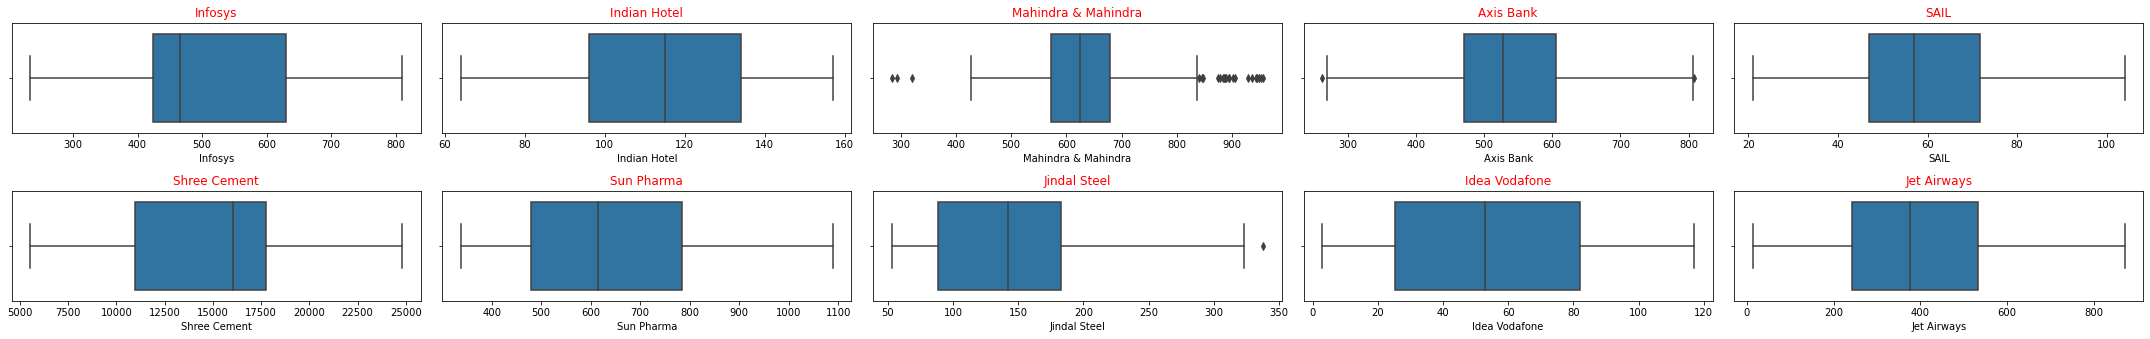

In [12]:
data_plot=df_num
fig=plt.figure(figsize=(30,30))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(13,5,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()

In [13]:
def treat_outlier(x):

    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
   
    IQR=q75-q25
    
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)

    return x.apply(lambda y: q5 if y < lower_bound else y).apply(lambda y: dt if y > upper_bound else y)

In [14]:
def print_outlier(x):
    
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    min_val = min(x)
    max_val = max(x)
   
    IQR=q75-q25
    
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
 
    return ('5%=',q5,'Q1=',q25,'Q3=',q75,'IQR=',IQR,'LL=',lower_bound,'UL=', upper_bound, '95%', dt, 'max=',max_val, 'min=',min_val)

In [15]:
for i in df_num.columns:    
    df_num[i]=treat_outlier(df_num[i])

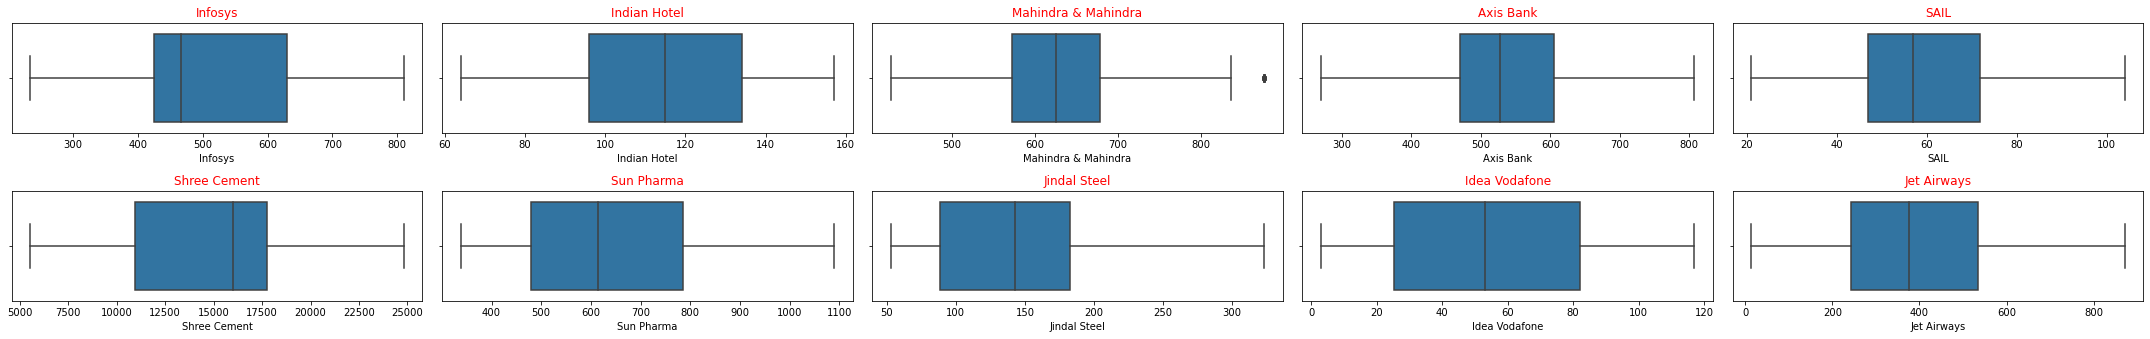

In [16]:
data_plot=df_num
fig=plt.figure(figsize=(30,30))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(13,5,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()

**Missing Value Treatment**

In [17]:
df.isnull().sum()

Date                   0
Infosys                0
Indian Hotel           0
Mahindra & Mahindra    0
Axis Bank              0
SAIL                   0
Shree Cement           0
Sun Pharma             0
Jindal Steel           0
Idea Vodafone          0
Jet Airways            0
dates                  0
dtype: int64

# 2.1 Draw Stock Price Graph(Stock Price vs Time) for any 2 given stocks with inference

In [18]:
df.columns

Index(['Date', 'Infosys', 'Indian Hotel', 'Mahindra & Mahindra', 'Axis Bank',
       'SAIL', 'Shree Cement', 'Sun Pharma', 'Jindal Steel', 'Idea Vodafone',
       'Jet Airways', 'dates'],
      dtype='object')

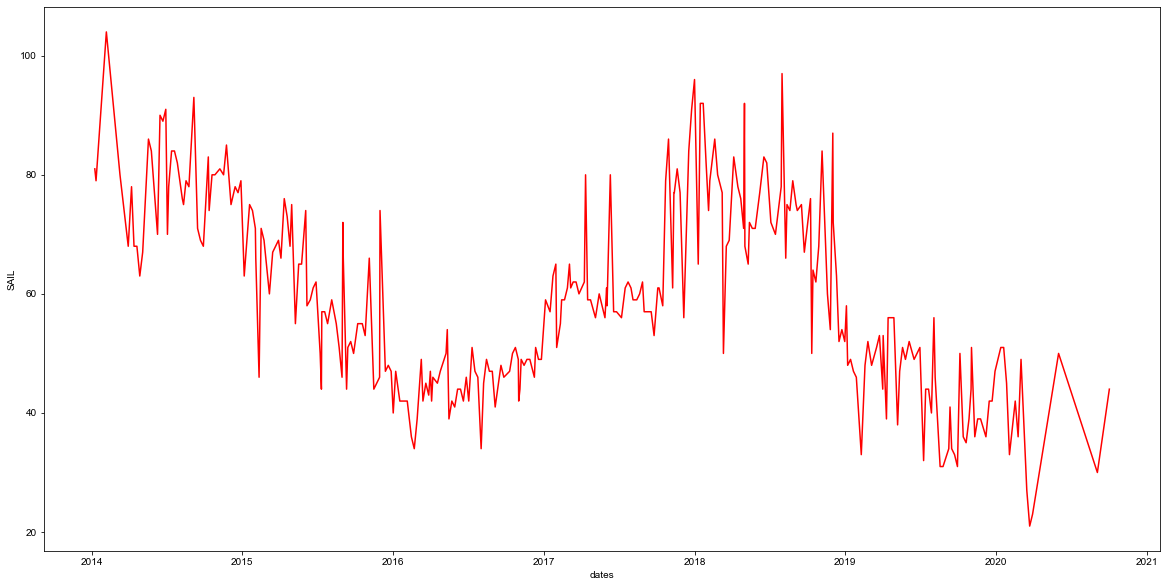

In [19]:
plt.figure(figsize=(20,10))
sns.lineplot(x = "dates", y = "SAIL", data=df, color='Red')
sns.set(font_scale=1)
plt.show()

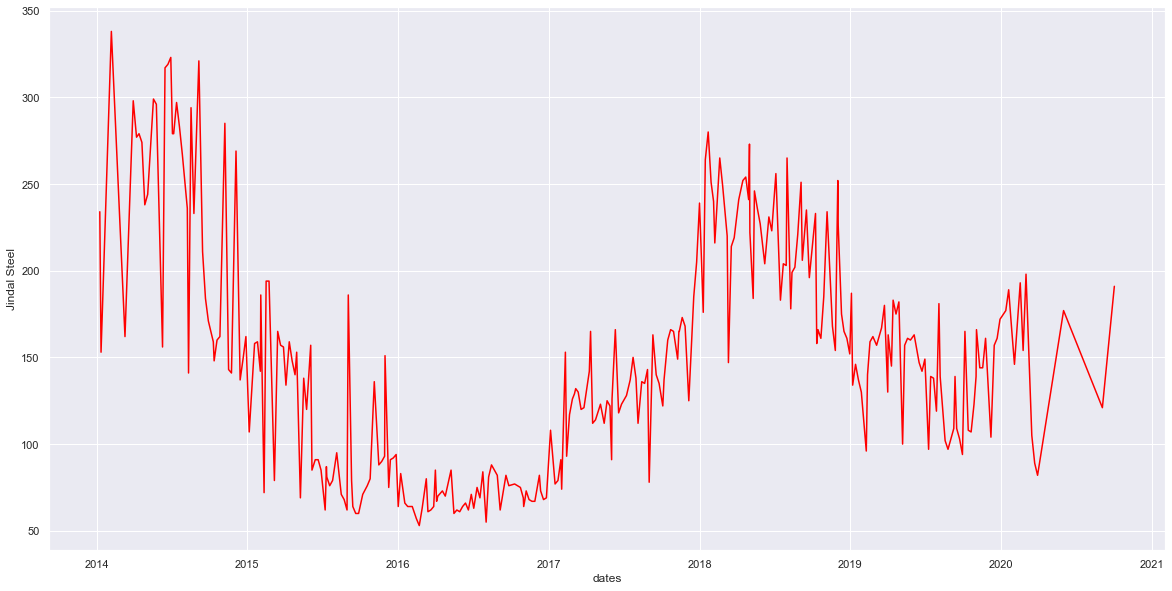

In [20]:
plt.figure(figsize=(20,10))
sns.lineplot(x = "dates", y = "Jindal Steel", data=df, color='Red')
sns.set(font_scale=1)
plt.show()

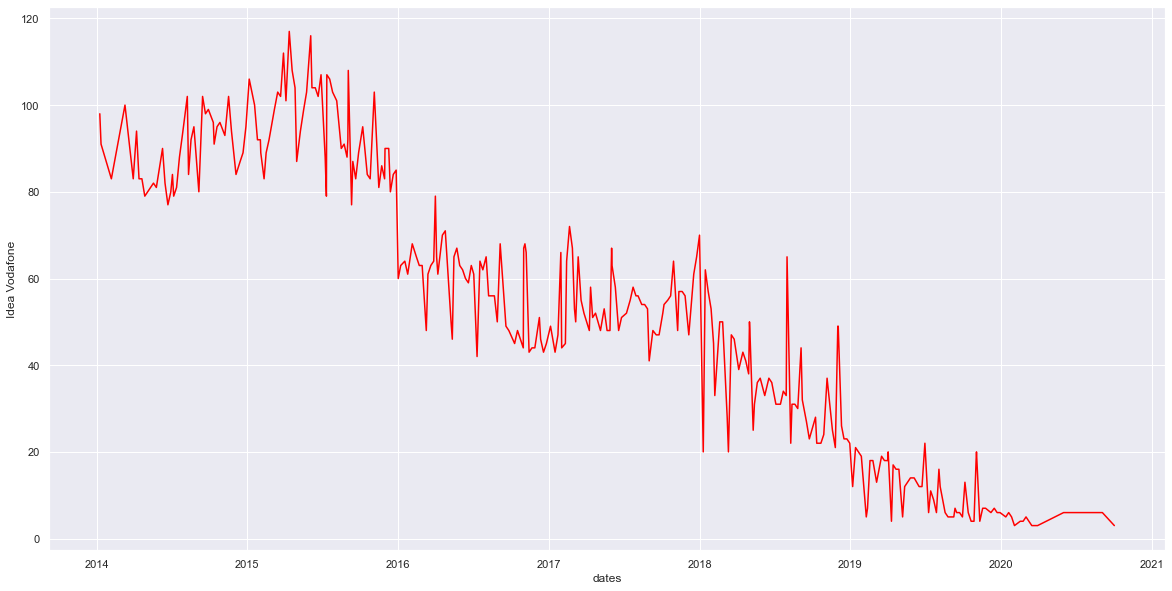

In [21]:
plt.figure(figsize=(20,10))
sns.lineplot(x = "dates", y = "Idea Vodafone", data=df, color='Red')
sns.set(font_scale=1)
plt.show()

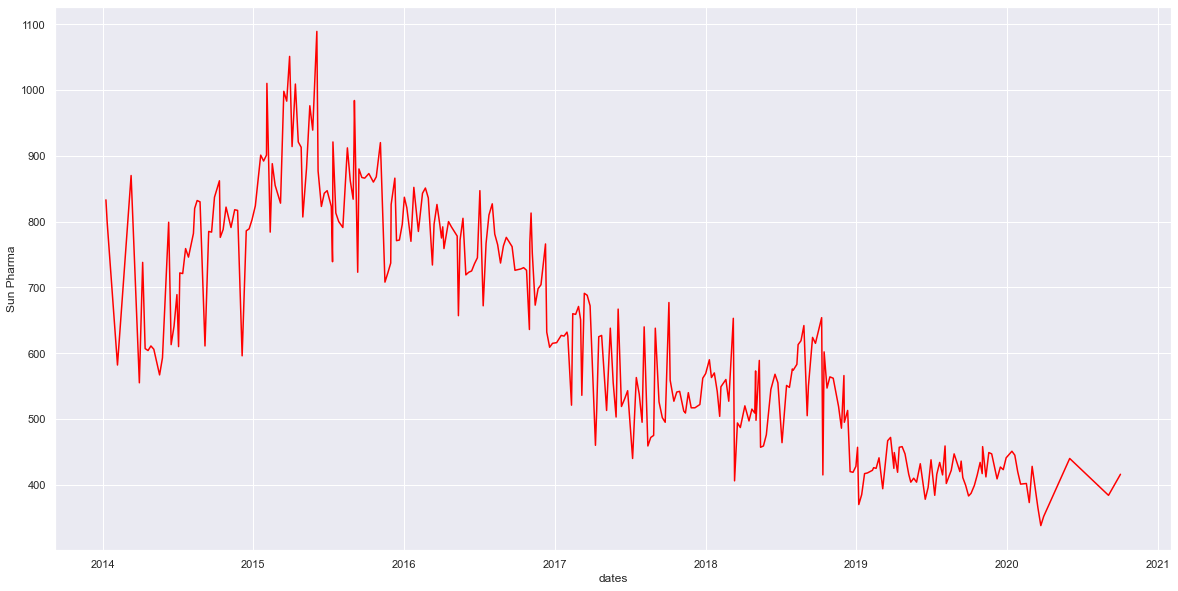

In [22]:
plt.figure(figsize=(20,10))
sns.lineplot(x = "dates", y = "Sun Pharma", data=df, color='Red')
sns.set(font_scale=1)
plt.show()

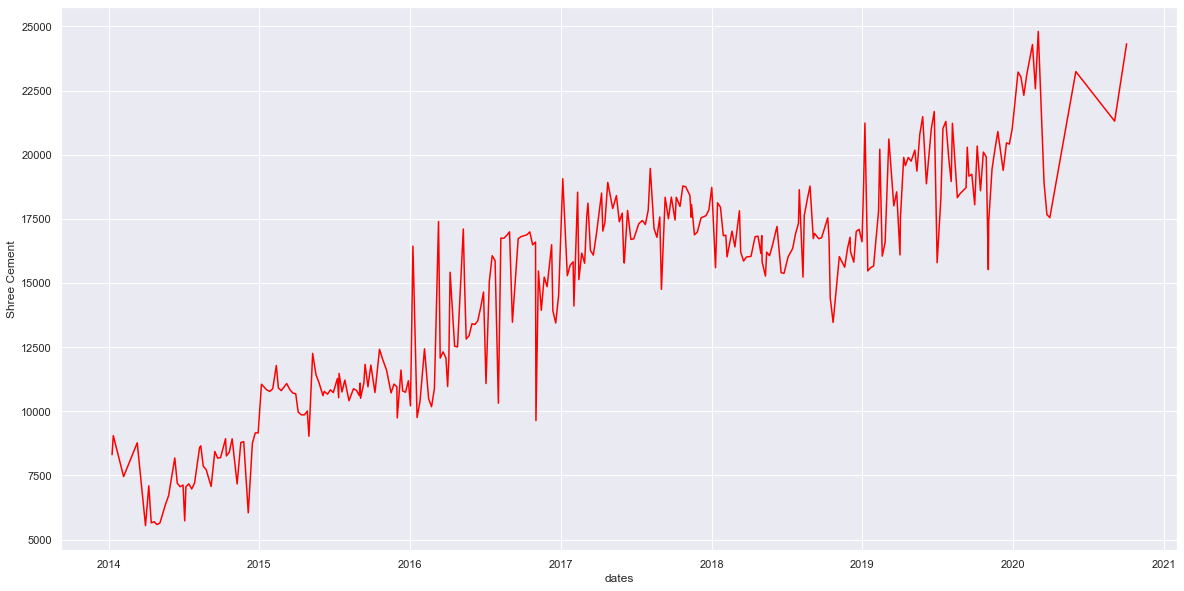

In [23]:
plt.figure(figsize=(20,10))
sns.lineplot(x = "dates", y = "Shree Cement", data=df, color='Red')
sns.set(font_scale=1)
plt.show()

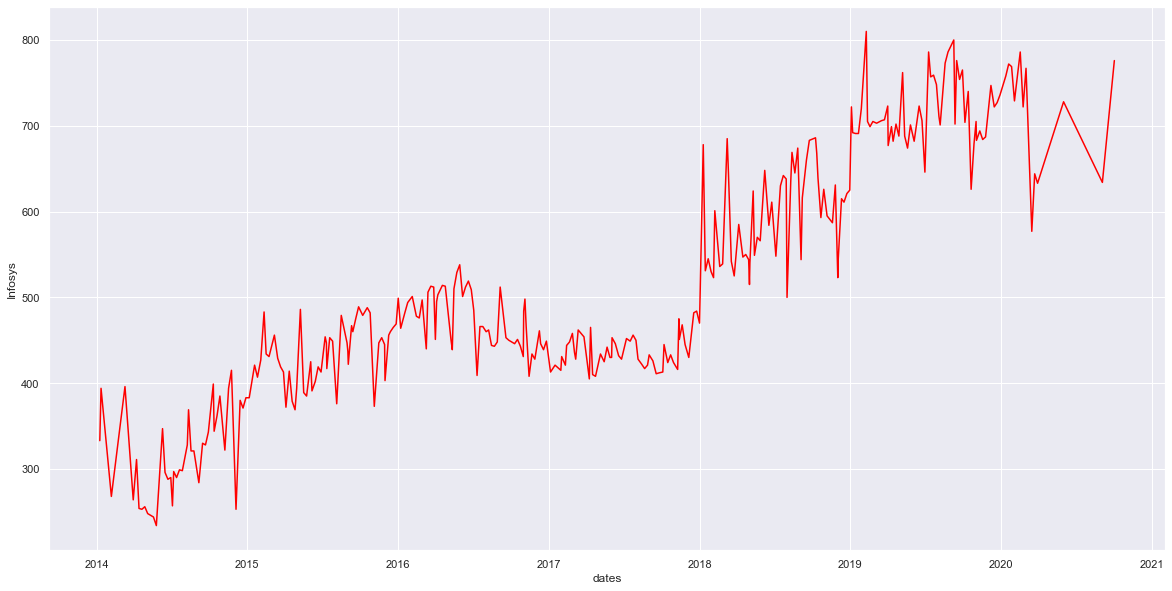

In [24]:
plt.figure(figsize=(20,10))
sns.lineplot(x = "dates", y = "Infosys", data=df, color='Red')
sns.set(font_scale=1)
plt.show()

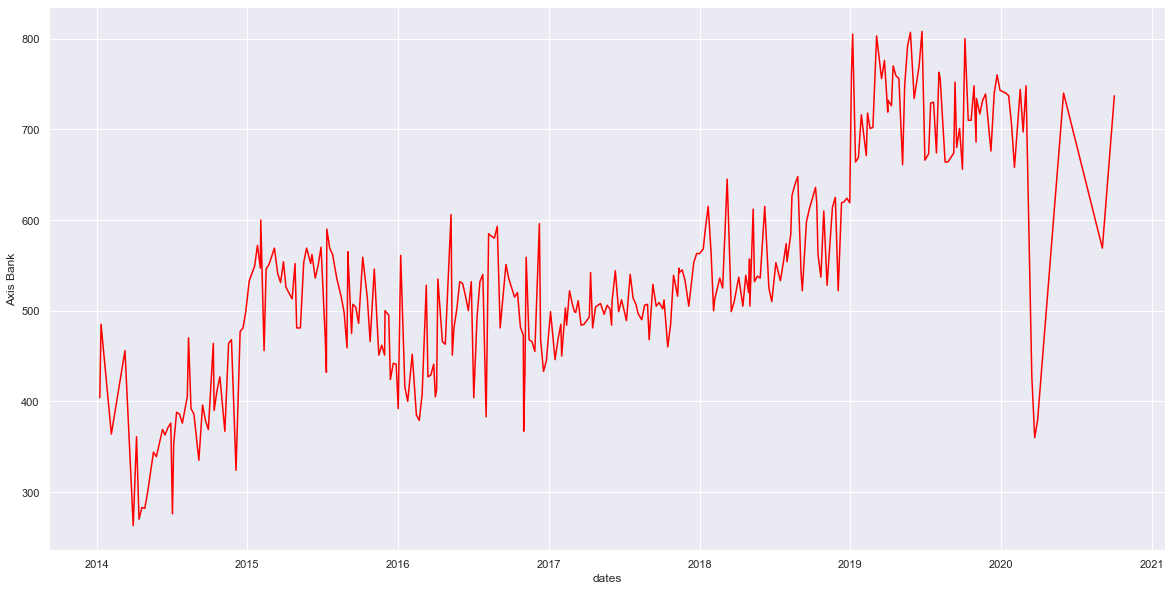

In [25]:
plt.figure(figsize=(20,10))
sns.lineplot(x = "dates", y = "Axis Bank", data=df, color='Red')
sns.set(font_scale=1)
plt.show()

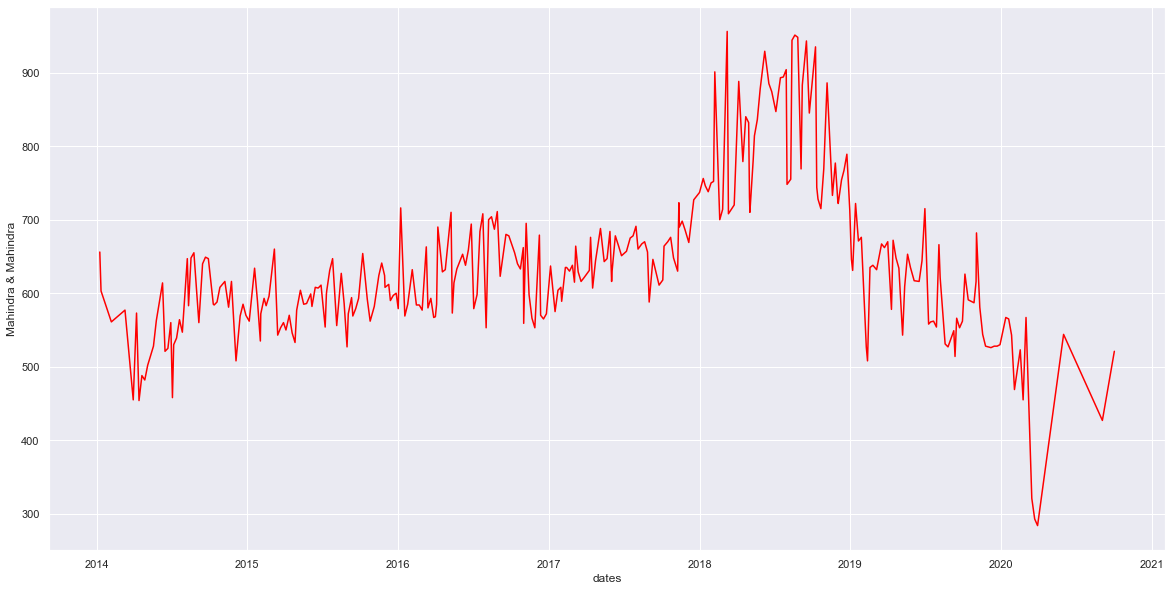

In [26]:
plt.figure(figsize=(20,10))
sns.lineplot(x = "dates", y = "Mahindra & Mahindra", data=df, color='Red')
sns.set(font_scale=1)
plt.show()

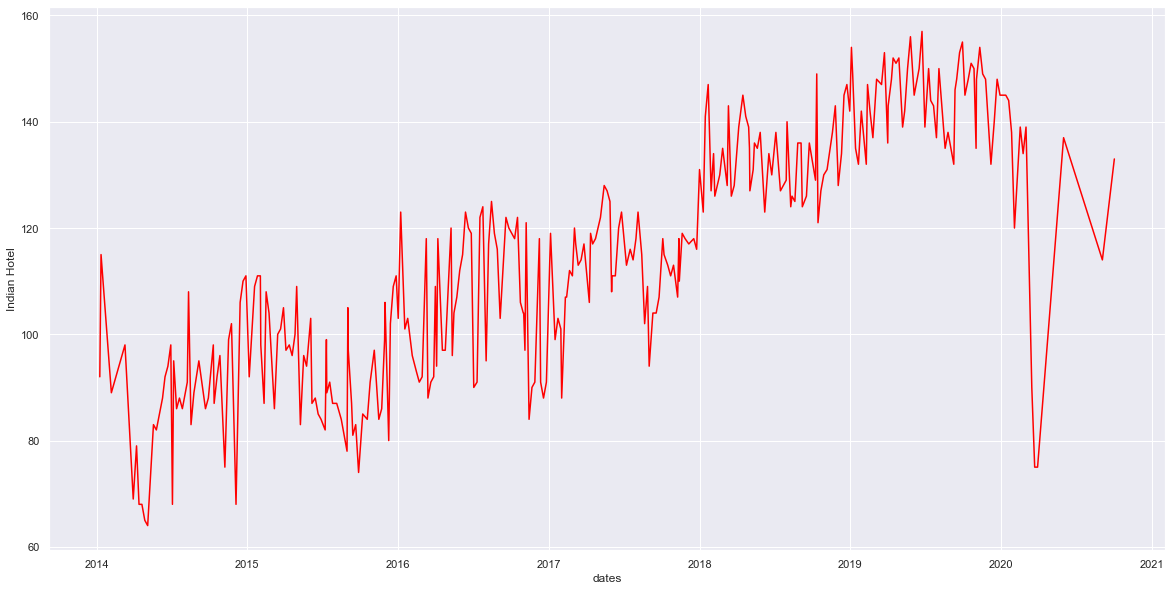

In [27]:
plt.figure(figsize=(20,10))
sns.lineplot(x = "dates", y = "Indian Hotel", data=df, color='Red')
sns.set(font_scale=1)
plt.show()

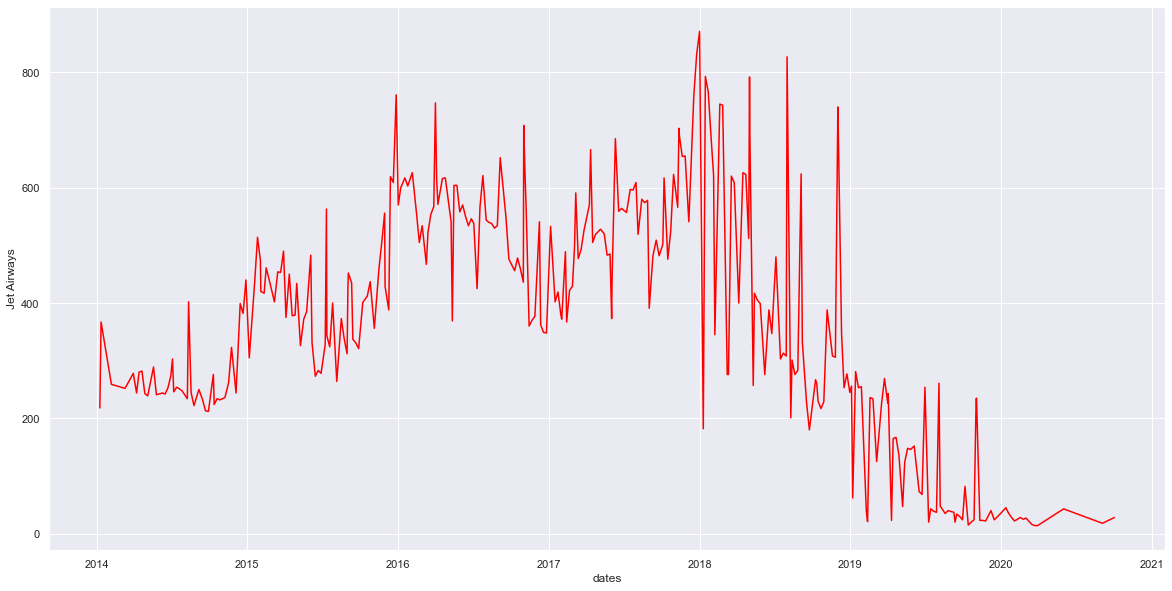

In [28]:
plt.figure(figsize=(20,10))
sns.lineplot(x = "dates", y = "Jet Airways", data=df, color='Red')
sns.set(font_scale=1)
plt.show()

# 2.2 Calculate Returns for all stocks with inference

In [29]:
stock_rtrn = np.log(df.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1)

In [30]:
stock_rtrn.shape

(314, 10)

In [31]:
stock_rtrn.head()

,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


In [32]:
stock_rtrn

,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846
...,...,...,...,...,...,...,...,...,...,...
309,0.009649,-0.110348,0.030305,-0.057580,-0.087011,0.023688,0.072383,-0.053346,-0.287682,-0.127833
310,-0.139625,-0.051293,-0.093819,-0.145324,-0.095310,-0.081183,-0.043319,-0.187816,0.693147,-0.200671
311,-0.094207,-0.236389,-0.285343,-0.284757,-0.105361,-0.119709,-0.050745,-0.141830,-0.693147,-0.117783
312,0.109856,-0.182322,-0.091269,-0.173019,-0.251314,-0.067732,-0.076851,-0.165324,0.000000,-0.133531


# 2.3 Calculate Stock Means and Standard Deviation for all stocks with inference

**Stock Mean**

In [33]:
stock_means = stock_rtrn.mean(axis = 0)
stock_means.sort_values(ascending=False)

Shree Cement           0.003681
Infosys                0.002794
Axis Bank              0.001167
Indian Hotel           0.000266
Sun Pharma            -0.001455
Mahindra & Mahindra   -0.001506
SAIL                  -0.003463
Jindal Steel          -0.004123
Jet Airways           -0.009548
Idea Vodafone         -0.010608
dtype: float64

**Standard Deviation**

In [34]:
stock_sd = stock_rtrn.std(axis = 0)
stock_sd.sort_values(ascending=False)

Idea Vodafone          0.104315
Jet Airways            0.097972
Jindal Steel           0.075108
SAIL                   0.062188
Indian Hotel           0.047131
Axis Bank              0.045828
Sun Pharma             0.045033
Mahindra & Mahindra    0.040169
Shree Cement           0.039917
Infosys                0.035070
dtype: float64

# 2.4 Draw a plot of Stock Means vs Standard Deviation and state your inference

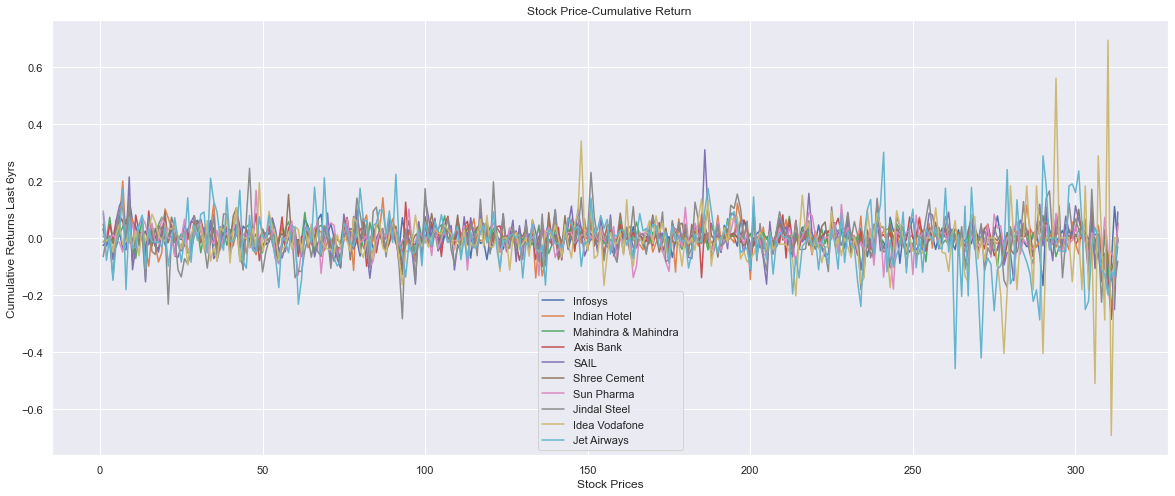

In [37]:
stock_rtrn.plot(figsize=(20,8)) 
plt.xlabel("Stock Prices") 
plt.ylabel("Cumulative Returns Last 6yrs") 
plt.title("Stock Price-Cumulative Return ")
plt.show()

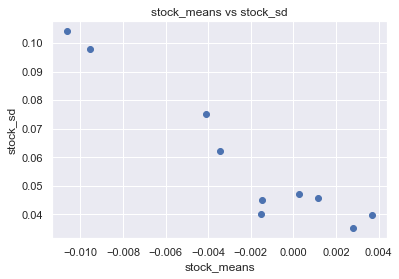

In [38]:
plt.scatter(stock_means, stock_sd, edgecolors='b')
plt.xlabel('stock_means')
plt.ylabel('stock_sd')
plt.title('stock_means vs stock_sd')
plt.show()

In [39]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df.sort_values(by=['Average'],ascending=False)

,Average,Volatility
Shree Cement,0.003681,0.039917
Infosys,0.002794,0.035070
Axis Bank,0.001167,0.045828
Indian Hotel,0.000266,0.047131
Sun Pharma,-0.001455,0.045033
Mahindra & Mahindra,-0.001506,0.040169
SAIL,-0.003463,0.062188
Jindal Steel,-0.004123,0.075108
Jet Airways,-0.009548,0.097972
Idea Vodafone,-0.010608,0.104315


In [40]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd}) 
df.sort_values(by=['Volatility'],ascending=False)

,Average,Volatility
Idea Vodafone,-0.010608,0.104315
Jet Airways,-0.009548,0.097972
Jindal Steel,-0.004123,0.075108
SAIL,-0.003463,0.062188
Indian Hotel,0.000266,0.047131
Axis Bank,0.001167,0.045828
Sun Pharma,-0.001455,0.045033
Mahindra & Mahindra,-0.001506,0.040169
Shree Cement,0.003681,0.039917
Infosys,0.002794,0.035070


**END**